# Textmining with NLTK



This tutorial is partly based on [](https://medium.com/analytics-vidhya/twitter-sentiment-analysis-134553698978)

## Setup

For this tutorial, you will need to install [nltk](https://anaconda.org/anaconda/nltk) and [wordcloud](https://anaconda.org/conda-forge/wordcloud).



In [1]:
import nltk
import pandas as pd

## Import data

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets.csv")
df

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@Albi_SideArms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyR6NAwap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@SawyerMerritt 🤣🤣
3,3,2021-12-10T04:42:00.000Z,1469165476911755264,44196397,@SawyerMerritt Tesla China has done amazing work
4,4,2021-12-10T04:21:25.000Z,1469160298158383109,44196397,@MrBeast 🙏
...,...,...,...,...,...
67,67,2021-12-03T23:35:30.000Z,1466914018615078912,44196397,@joroulette It is an honor to serve NASA and t...
68,68,2021-12-03T19:28:57.000Z,1466851970443010056,44196397,@NASASpaceflight 39A is hallowed spaceflight g...
69,69,2021-12-03T19:22:34.000Z,1466850364012044288,44196397,@EvaFoxU @SawyerMerritt Huge cranes are cool haha
70,70,2021-12-03T19:20:15.000Z,1466849780253003782,44196397,@PPathole @ErcXspace @SpaceX This will look so...


## Lowercase

In [54]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].str.lower()
df

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣
3,3,2021-12-10T04:42:00.000Z,1469165476911755264,44196397,@sawyermerritt tesla china has done amazing work
4,4,2021-12-10T04:21:25.000Z,1469160298158383109,44196397,@mrbeast 🙏
...,...,...,...,...,...
67,67,2021-12-03T23:35:30.000Z,1466914018615078912,44196397,@joroulette it is an honor to serve nasa and t...
68,68,2021-12-03T19:28:57.000Z,1466851970443010056,44196397,@nasaspaceflight 39a is hallowed spaceflight g...
69,69,2021-12-03T19:22:34.000Z,1466850364012044288,44196397,@evafoxu @sawyermerritt huge cranes are cool haha
70,70,2021-12-03T19:20:15.000Z,1466849780253003782,44196397,@ppathole @ercxspace @spacex this will look so...


## Tokenization

First, we remove noisy data like punctuations, hashtags, @ and others that are not alphanumeric. Only alphanumeric data are meaningful data that can help us in identifying the sentiments. 

To remove the noisy data, we will import [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) which will split the strings into substrings based on a [regular expression](https://www.w3schools.com/python/python_regex.asp). Use this [interactive regular expressions tool](https://regex101.com/) to learn more about regualr expressions 

- `\w+` matches Unicode word characters with one or more occurrences; this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [55]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df['text_token']


0                       [albi_sidearms, maybe, i, will]
1                      [jack, https, t, co, ueyr6nawap]
2                                       [sawyermerritt]
3     [sawyermerritt, tesla, china, has, done, amazi...
4                                             [mrbeast]
                            ...                        
67    [joroulette, it, is, an, honor, to, serve, nas...
68    [nasaspaceflight, 39a, is, hallowed, spaceflig...
69    [evafoxu, sawyermerritt, huge, cranes, are, co...
70    [ppathole, ercxspace, spacex, this, will, look...
71            [evafoxu, sawyermerritt, i, love, norway]
Name: text_token, Length: 72, dtype: object

## Stopwords

In [56]:
from nltk.corpus import stopwords
#nltk.download(‘stopwords’)

# make a list of german stopwords
stopwords = nltk.corpus.stopwords.words("english")

# extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [57]:
#remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df['text_token'] 

0                                [albi_sidearms, maybe]
1                                [jack, co, ueyr6nawap]
2                                       [sawyermerritt]
3     [sawyermerritt, tesla, china, done, amazing, w...
4                                             [mrbeast]
                            ...                        
67    [joroulette, honor, serve, nasa, countries, in...
68    [nasaspaceflight, 39a, hallowed, spaceflight, ...
69    [evafoxu, sawyermerritt, huge, cranes, cool, h...
70         [ppathole, ercxspace, spacex, look, awesome]
71               [evafoxu, sawyermerritt, love, norway]
Name: text_token, Length: 72, dtype: object

## Remove infrequent words

We remove all words that have a length <=2. In general, small words (length <=2 ) aren’t useful for sentiment analysis because they have no meaning. These most probably are noise in our analysis.

In [58]:
df['text_token'] = df['text_token'].apply(lambda x: ' '.join([w for w in x if len(w)>2]))

In [59]:
df['text_token']

0                                   albi_sidearms maybe
1                                       jack ueyr6nawap
2                                         sawyermerritt
3           sawyermerritt tesla china done amazing work
4                                               mrbeast
                            ...                        
67    joroulette honor serve nasa countries internat...
68    nasaspaceflight 39a hallowed spaceflight groun...
69          evafoxu sawyermerritt huge cranes cool haha
70               ppathole ercxspace spacex look awesome
71                    evafoxu sawyermerritt love norway
Name: text_token, Length: 72, dtype: object

## Lemmatization

In [9]:
# nltk.download('wordnet')

In [60]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_token'] = df['text_token'].apply(wordnet_lem.lemmatize)

In [61]:
df['text_token']

0                                   albi_sidearms maybe
1                                       jack ueyr6nawap
2                                         sawyermerritt
3           sawyermerritt tesla china done amazing work
4                                               mrbeast
                            ...                        
67    joroulette honor serve nasa countries internat...
68    nasaspaceflight 39a hallowed spaceflight groun...
69          evafoxu sawyermerritt huge cranes cool haha
70               ppathole ercxspace spacex look awesome
71                    evafoxu sawyermerritt love norway
Name: text_token, Length: 72, dtype: object

## Word cloud

[Word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery)

In [62]:
all_words = ' '.join([word for word in df['text_token']])
all_words

'albi_sidearms maybe jack ueyr6nawap sawyermerritt sawyermerritt tesla china done amazing work mrbeast planet4589 earth called water samifouad tobyliiiiiiiiii noobtoob thinking quitting jobs amp becoming influencer full time wdyt zrz1eflywy teslaownerssv billym2k thecryptocpa ballaerospace nasa_marshall nasa spacex congrats _rykllan spacex felixschlang marcushouse erdayastronaut bluemoondance74 nexthorizonssf rocket fleets grows squawkcnbc gordonjohnson19 rainmaker1973 amazing engine cnunezimages spacex spaceintellige3 rainmaker1973 shanghai beautiful ppathole probably way sooner hot civilization unless susceptible extreme natural disasters nuclear power plants shut watcherguru taxing billionaires 100 drops national debt one year deficit spending watcherguru scary something got give nothing permanent temporary government program traderjourney exactly lot accounting trickery bill disclosed public temporary provisions build back better act become permanent national debt increase kkdpc45j

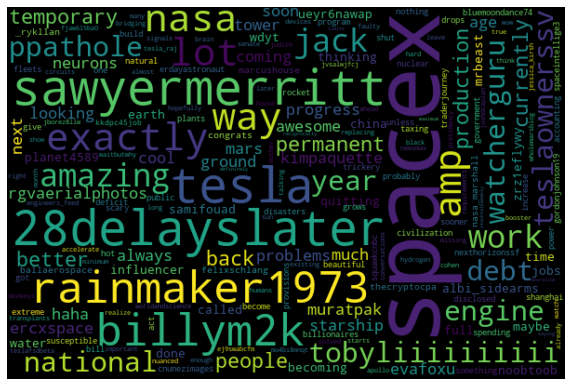

In [63]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Different style:

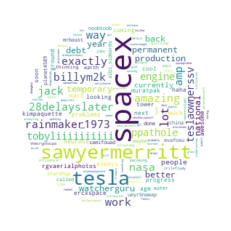

In [64]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

## Frequency distributions

In [65]:
from nltk.probability import FreqDist

words = nltk.tokenize.word_tokenize(all_words)
fd = FreqDist(words)

### Most common words

In [66]:
fd.most_common(3)

[('spacex', 7), ('sawyermerritt', 5), ('tesla', 5)]

In [71]:
fd.tabulate(3)

       spacex sawyermerritt         tesla 
            7             5             5 


In [67]:
# Obtain top 10 words
top_10 = fd.most_common(10)

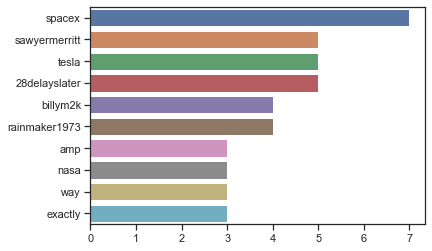

In [69]:
import seaborn as sns
sns.set_theme(style="ticks")

# Make pandas series for easier plotting
fdist = pd.Series(dict(top_10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
sns.barplot(y=fdist.index, x=fdist.values);

### Search words

In [72]:
fd["nasa"]

3

## Sentiment

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
